In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (11,8)

In [38]:
#Een dataframe aanmaken van de csv en de lege kolommen verwijderen.
df = pd.read_csv('train.csv').dropna(axis='columns')

In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [41]:
#Eerst onderzoeken in wat voor format de data staat, ontdekken welke getallen numeriek zijn en welke data relevant is om voor een voorspellend model te gebruiken.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [42]:
#Om de verkoopprijs in de toekomst te voorspellen, hebben we de variabelen 'TotalBsmtSF' en 'SalesPrice' nodig.
#De data die nodig is om een regressielijn te maken, zijn alle int dataypes in de dataset. 
df2 = df[['TotalBsmtSF','SalePrice']]

In [57]:
#Definieren van X,y
y = np.array(df2.SalePrice)
X = np.array(df2.TotalBsmtSF).reshape(-1, 1)

#Aanmaken van een lineare regressie en definieren als reg
reg = LinearRegression().fit(X, y)

In [44]:
print(reg.score(X,y))
print(reg.coef_)
print(reg.intercept_)

0.37648109325168655
[111.10960369]
63430.62854550623


In [58]:
#Er wordt  een voorspelling uitgevoerd en toegevoegd in de dataframe als 'Predict'
df2['Predict'] = reg.predict(X)

C:\Users\Sener\AppData\Local\Temp\ipykernel_18636\2970505492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Predict'] = reg.predict(X)


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

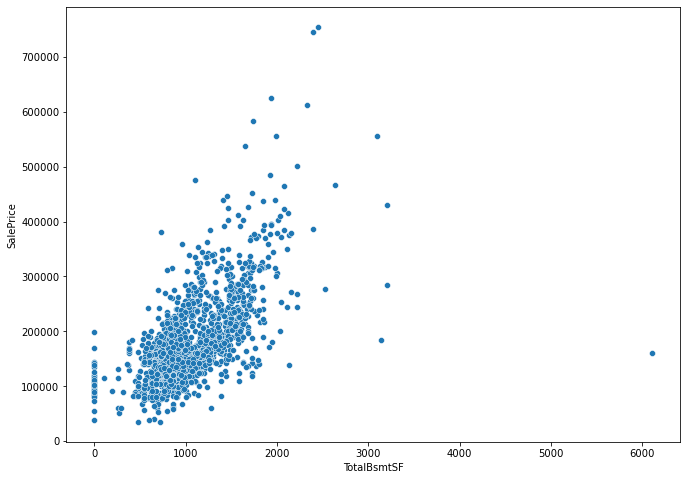

In [46]:
#De scatterplot visualiseren voor een duidelijk overzicht.
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df)

C:\Users\Sener\AppData\Local\Temp\ipykernel_18636\1224919656.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df3 = df2.melt(id_vars='TotalBsmtSF', var_name='Predcitions', value_name = 'SalePrice')


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

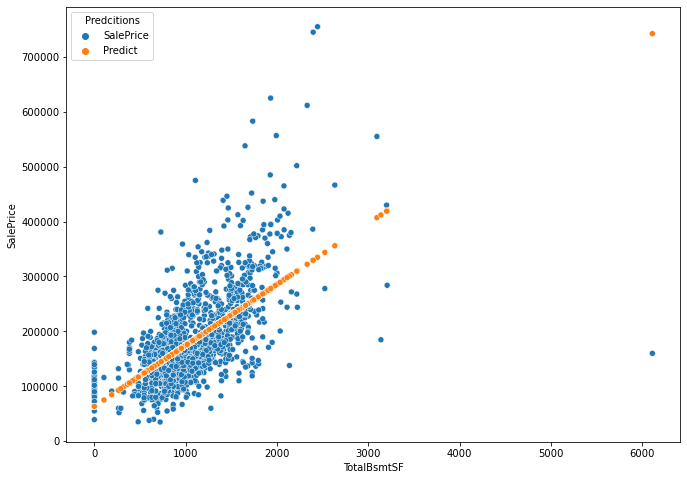

In [47]:
#Een lineare regressie gevisualiseerd van de voorspellingen die eerder zijn gemaakt.
df3 = df2.melt(id_vars='TotalBsmtSF', var_name='Predictions', value_name = 'SalePrice')

sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df3, hue="Predcitions")

In [ ]:
#De demo regressielijn gaat van boven naar beneden. 
#De lijn in de demo gaat van een positief getal naar een negatief getal. 
#In de huidige regressie model gaat start de regressielijn beneden en eindigt boven.

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dt = DecisionTreeRegressor(min_samples_leaf = 20).fit(X, y)

In [50]:
print(dt.score(X,y))

0.4987884156869632


In [53]:
#Nieuwe voorspelling toegevoegd in de dataframe
df2['Predict_tree'] = dt.predict(X)

C:\Users\Sener\AppData\Local\Temp\ipykernel_18636\598158665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Predict_tree'] = dt.predict(X)


C:\Users\Sener\AppData\Local\Temp\ipykernel_18636\1224919656.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df3 = df2.melt(id_vars='TotalBsmtSF', var_name='Predcitions', value_name = 'SalePrice')


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

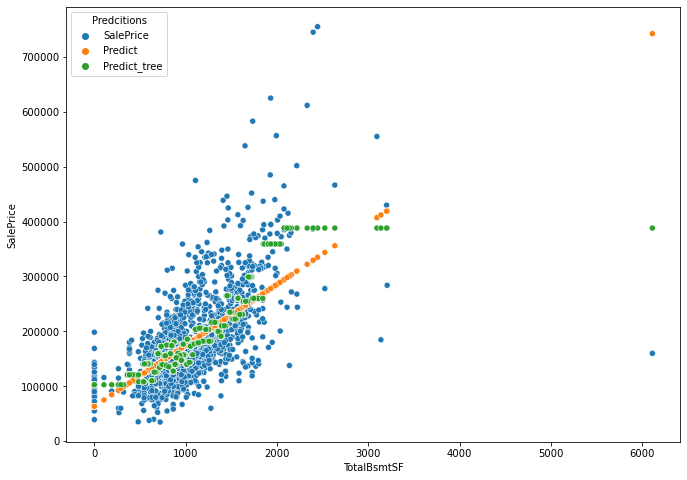

In [54]:
#De nieuwe voorspelling wordt gevisualiseerd als een scatterplot.
df3 = df2.melt(id_vars='TotalBsmtSF', var_name='Predcitions', value_name = 'SalePrice')

sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df3, hue="Predcitions")